In [24]:
!pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.8 MB/s eta 0:00:00


🚀 Starting multi-agent market research system...

🔍 Collecting data from multiple sources...
  - Fetching data from LinkedIn...
  - Fetching data from Bayt...
  - Fetching data from Wuzzuf...
  - Fetching data from Glassdoor...
  - Fetching data from Naukrigulf...
  - Fetching data from GulfTalent...
✅ Collected 90 jobs from 6 sources

⚙️ Processing and enriching data...
✅ Data processed and enriched with skills, experience levels, and salary data

📊 Analyzing market trends...
✅ Market trends analyzed

🎨 Creating visual dashboard...


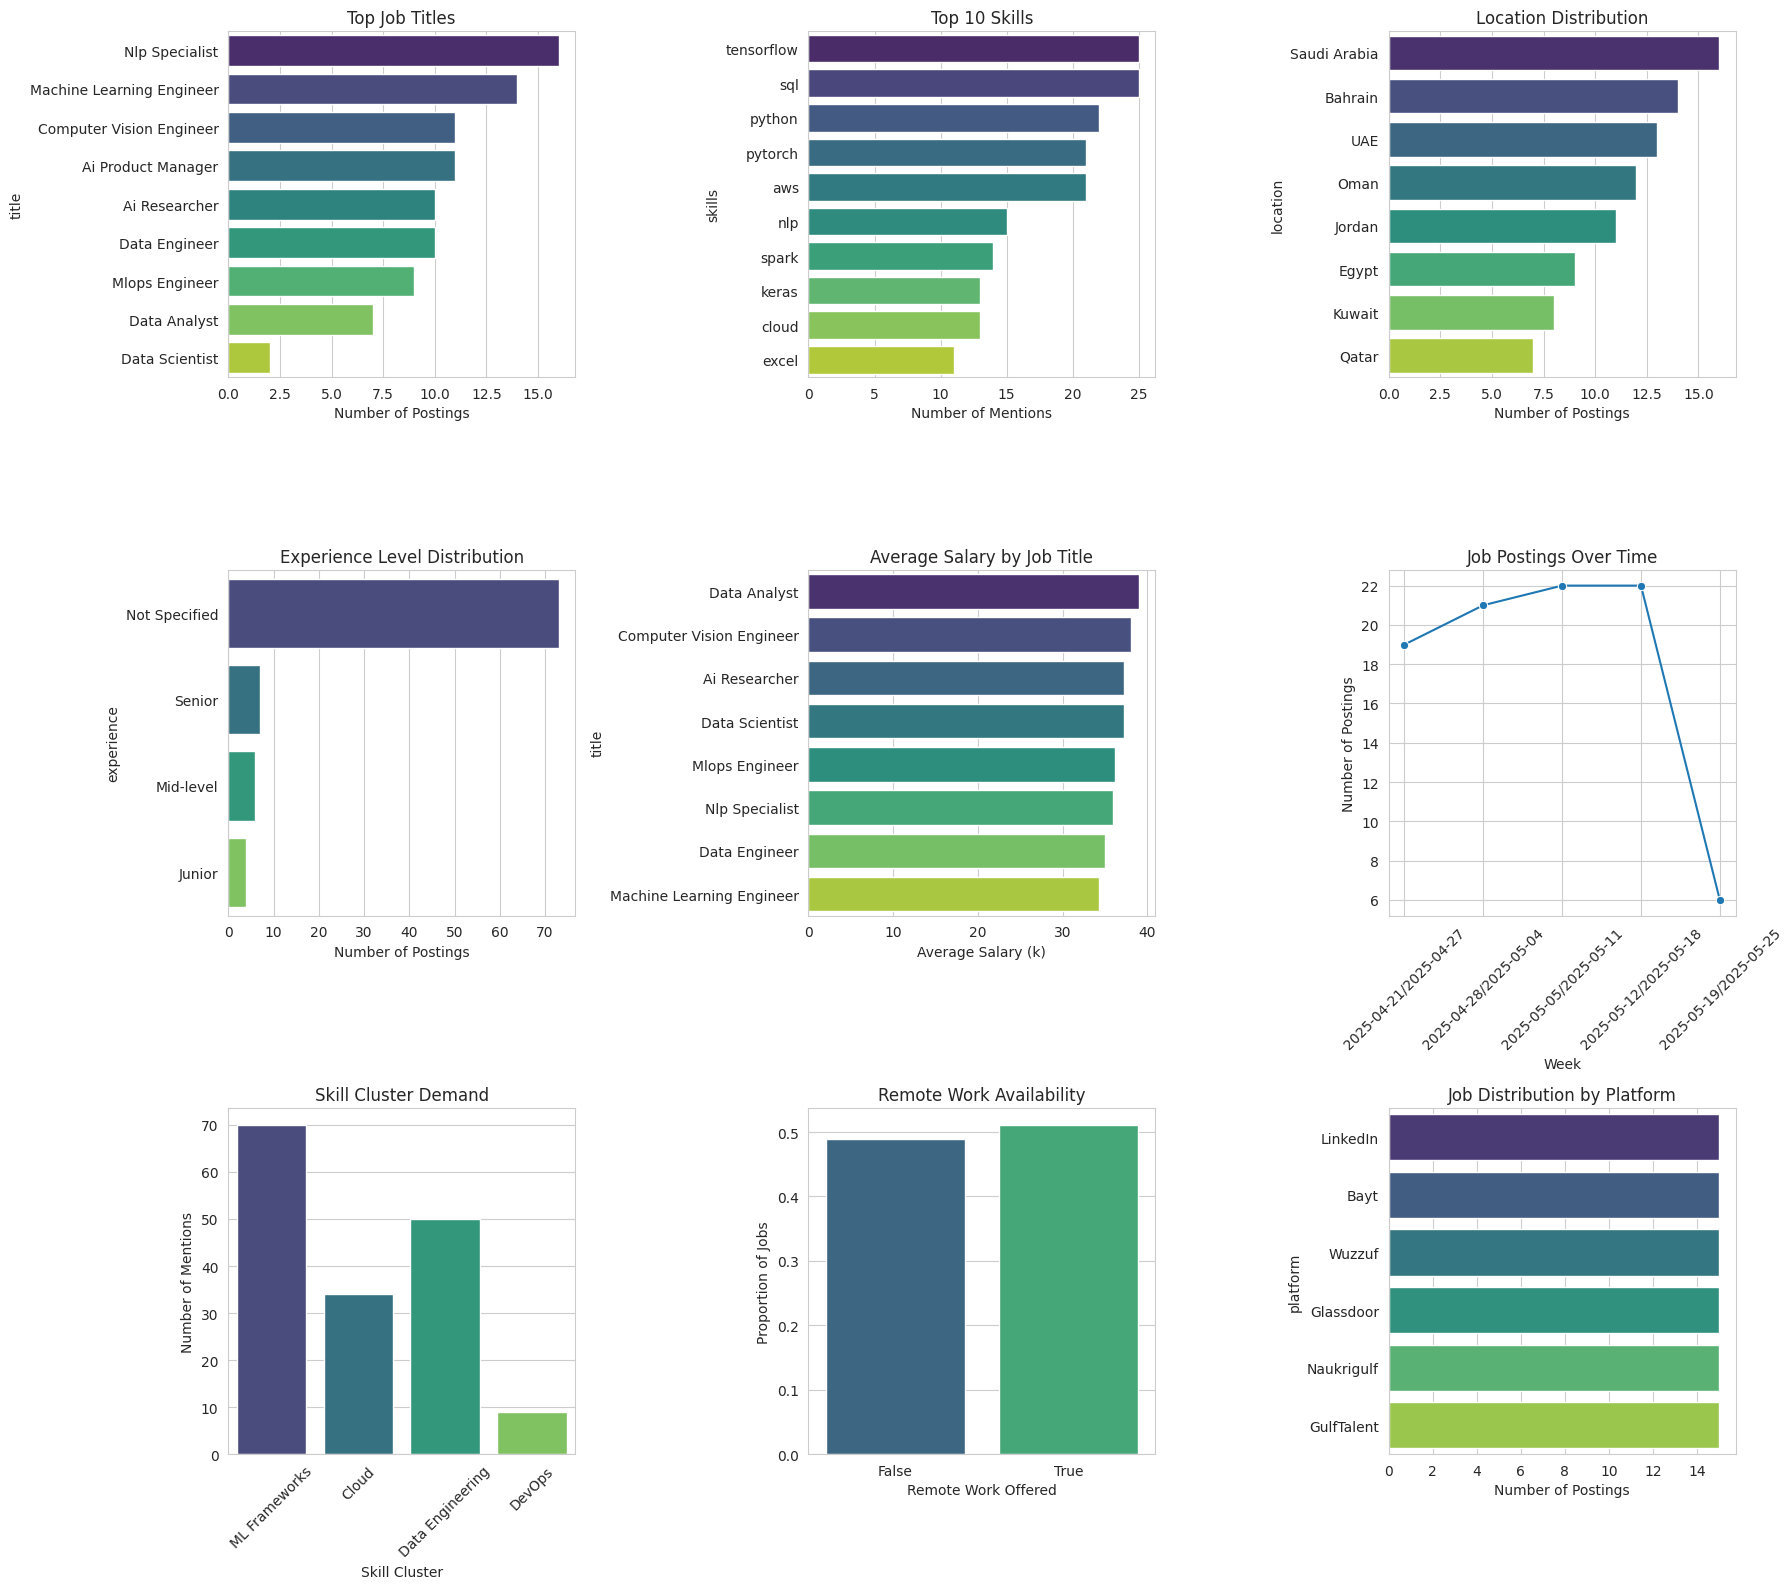

✅ Dashboard saved to dashboard.png

📝 Generating comprehensive report...
✅ Report generated (report.md)

✨ Analysis complete! Results saved to:
- ai_ml_mena_jobs_enhanced.csv
- ai_ml_analysis_results.json
- report.md
- dashboard.png


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter
from datetime import datetime
import json
import numpy as np
from textblob import TextBlob  # For sentiment analysis
from faker import Faker  # For more realistic fake data
import warnings
warnings.filterwarnings('ignore')

# Initialize Faker for realistic fake data
fake = Faker()

# --- Agent Classes ---
class DataCollector:
    """Agent responsible for gathering job data from multiple sources"""
    def __init__(self):
        self.sources = ['LinkedIn', 'Bayt', 'Wuzzuf', 'Glassdoor', 'Naukrigulf', 'GulfTalent']
        self.cache = {}

    def fetch_data(self, source, n=5):
        """Simulate fetching data from a specific source"""
        if source not in self.cache:
            self.cache[source] = self._generate_source_data(source, n)
        return self.cache[source]

    def _generate_source_data(self, source, n):
        """Generate realistic job data for a specific platform"""
        titles = ['Data Scientist', 'Machine Learning Engineer', 'AI Researcher',
                 'Data Analyst', 'MLOps Engineer', 'AI Product Manager',
                 'Computer Vision Engineer', 'NLP Specialist', 'Data Engineer']

        # Platform-specific variations
        if source == 'LinkedIn':
            companies = [fake.company() for _ in range(10)] + ['Microsoft', 'Amazon', 'Google']
        elif source == 'Bayt':
            companies = [fake.company() for _ in range(10)] + ['Aramco', 'STC', 'Emirates Group']
        else:
            companies = [fake.company() for _ in range(10)]

        locations = ['UAE', 'Saudi Arabia', 'Egypt', 'Qatar', 'Jordan', 'Kuwait', 'Oman', 'Bahrain']

        # Platform-specific job descriptions
        base_descs = [
            "We need someone skilled in Python, TensorFlow, and cloud computing.",
            "Strong PyTorch, NLP, and CI/CD experience required.",
            "Looking for an AI expert with SQL, Spark, and AWS experience.",
            "Must know Scikit-learn, Excel, and data visualization tools.",
            "Deep learning experience with Keras and computer vision is a plus.",
            "Seeking {experience} professional with {skills} experience.",
            "Join our team to work on cutting-edge {field} projects."
        ]

        data = []
        for _ in range(n):
            exp_level = random.choice(['Junior', 'Mid-level', 'Senior'])
            field = random.choice(['AI', 'ML', 'data science', 'computer vision', 'NLP'])
            skills = random.sample(['Python', 'TensorFlow', 'PyTorch', 'SQL', 'AWS'], k=3)

            desc = random.choice(base_descs)
            desc = desc.format(experience=exp_level, skills=', '.join(skills), field=field)

            # Add some platform-specific text
            if source == 'LinkedIn':
                desc += " #AI #MachineLearning #TechJobs"
            elif source == 'Wuzzuf':
                desc += "\nApply now on Wuzzuf.net"

            salary = f"{random.randint(5,30)}k-{random.randint(30,80)}k {random.choice(['USD', 'SAR', 'AED'])}"

            job = {
                'title': random.choice(titles),
                'company': random.choice(companies),
                'location': random.choice(locations),
                'platform': source,
                'posted_date': (datetime.now() - pd.Timedelta(days=random.randint(0, 30))).strftime('%Y-%m-%d'),
                'description': desc,
                'salary': salary,
                'job_type': random.choice(['Full-time', 'Contract', 'Part-time']),
                'remote': random.choice([True, False])
            }
            data.append(job)
        return pd.DataFrame(data)

class DataProcessor:
    """Agent responsible for cleaning and processing data"""
    def __init__(self):
        self.skill_keywords = {
            'python': ['python', 'pandas', 'numpy'],
            'tensorflow': ['tensorflow', 'tf'],
            'pytorch': ['pytorch', 'torch'],
            'scikit-learn': ['scikit-learn', 'sklearn'],
            'sql': ['sql', 'mysql', 'postgresql'],
            'excel': ['excel', 'spreadsheet'],
            'keras': ['keras'],
            'aws': ['aws', 'amazon web services'],
            'spark': ['spark', 'pyspark'],
            'nlp': ['nlp', 'natural language processing'],
            'ci/cd': ['ci/cd', 'continuous integration'],
            'cloud': ['cloud', 'azure', 'gcp'],
            'docker': ['docker', 'container'],
            'kubernetes': ['kubernetes', 'k8s']
        }

    def clean_data(self, df):
        """Clean and standardize the data"""
        # Standardize text fields
        df['title'] = df['title'].str.strip().str.title()
        df['company'] = df['company'].str.strip()

        # Convert dates
        df['posted_date'] = pd.to_datetime(df['posted_date'])

        # Add days since posted
        df['days_since_posted'] = (datetime.now() - df['posted_date']).dt.days

        return df

    def extract_skills(self, desc):
        """Enhanced skill extraction with keyword groups"""
        desc = desc.lower()
        skills = []

        for skill, keywords in self.skill_keywords.items():
            if any(kw in desc for kw in keywords):
                skills.append(skill)

        return skills

    def extract_experience(self, desc):
        """Enhanced experience level extraction"""
        desc = desc.lower()

        if 'senior' in desc or 'lead' in desc or 'principal' in desc:
            return 'Senior'
        elif 'junior' in desc or 'entry' in desc or 'graduate' in desc:
            return 'Junior'
        elif 'mid' in desc or 'intermediate' in desc:
            return 'Mid-level'
        else:
            return 'Not Specified'

    def extract_salary(self, salary_str):
        """Extract numeric salary values"""
        try:
            if '-' in salary_str:
                low, high = salary_str.split('-')
                low = int(''.join(filter(str.isdigit, low)))
                high = int(''.join(filter(str.isdigit, high)))
                return (low + high) / 2
            else:
                return int(''.join(filter(str.isdigit, salary_str)))
        except:
            return np.nan

    def process_data(self, df):
        """Run all processing steps"""
        df = self.clean_data(df)
        df['skills'] = df['description'].apply(self.extract_skills)
        df['experience'] = df['description'].apply(self.extract_experience)
        df['salary_avg'] = df['salary'].apply(self.extract_salary)
        return df

class Analyzer:
    """Agent responsible for analyzing trends and generating insights"""
    def __init__(self):
        self.skill_clusters = {
            'ML Frameworks': ['tensorflow', 'pytorch', 'keras', 'scikit-learn'],
            'Cloud': ['aws', 'cloud', 'azure', 'gcp'],
            'Data Engineering': ['sql', 'spark', 'excel'],
            'DevOps': ['ci/cd', 'docker', 'kubernetes']
        }

    def analyze_trends(self, df):
        """Generate comprehensive market trends"""
        analysis = {}

        # Basic counts
        analysis['top_titles'] = df['title'].value_counts().head(10)
        analysis['top_companies'] = df['company'].value_counts().head(10)
        analysis['locations'] = df['location'].value_counts()
        analysis['experience_levels'] = df['experience'].value_counts()
        analysis['platforms'] = df['platform'].value_counts()

        # Skill analysis
        all_skills = df['skills'].explode()
        analysis['top_skills'] = all_skills.value_counts()

        # Skill clusters
        for cluster, skills in self.skill_clusters.items():
            analysis[f'{cluster}_demand'] = all_skills[all_skills.isin(skills)].count()

        # Salary analysis
        analysis['avg_salary_by_title'] = df.groupby('title')['salary_avg'].mean().sort_values(ascending=False)
        analysis['avg_salary_by_exp'] = df.groupby('experience')['salary_avg'].mean().sort_values(ascending=False)
        analysis['avg_salary_by_location'] = df.groupby('location')['salary_avg'].mean().sort_values(ascending=False)

        # Time analysis
        df['posting_week'] = df['posted_date'].dt.to_period('W')
        analysis['postings_over_time'] = df.groupby('posting_week').size()

        # Remote work analysis
        analysis['remote_ratio'] = df['remote'].value_counts(normalize=True)

        return analysis

    def sentiment_analysis(self, descriptions):
        """Analyze sentiment of job descriptions"""
        sentiments = [TextBlob(desc).sentiment.polarity for desc in descriptions]
        avg_sentiment = np.mean(sentiments)
        return {
            'average_sentiment': avg_sentiment,
            'positive_ratio': sum(1 for s in sentiments if s > 0.1) / len(sentiments),
            'negative_ratio': sum(1 for s in sentiments if s < -0.1) / len(sentiments)
        }

class Visualizer:
    """Agent responsible for creating visualizations"""
    def __init__(self):
        self.style = 'whitegrid'
        self.palette = 'viridis'

    def create_dashboard(self, analysis):
        """Create a comprehensive dashboard of visualizations that displays in Colab"""
        # Enable matplotlib inline for Colab
        from matplotlib import pyplot as plt
        %matplotlib inline

        sns.set_style(self.style)
        plt.figure(figsize=(18, 16))

        # Top Job Titles
        plt.subplot(3, 3, 1)
        sns.barplot(x=analysis['top_titles'].values, y=analysis['top_titles'].index, palette=self.palette)
        plt.title('Top Job Titles')
        plt.xlabel('Number of Postings')

        # Top Skills
        plt.subplot(3, 3, 2)
        sns.barplot(x=analysis['top_skills'].values[:10], y=analysis['top_skills'].index[:10], palette=self.palette)
        plt.title('Top 10 Skills')
        plt.xlabel('Number of Mentions')

        # Location Distribution
        plt.subplot(3, 3, 3)
        sns.barplot(x=analysis['locations'].values, y=analysis['locations'].index, palette=self.palette)
        plt.title('Location Distribution')
        plt.xlabel('Number of Postings')

        # Experience Levels
        plt.subplot(3, 3, 4)
        sns.barplot(x=analysis['experience_levels'].values, y=analysis['experience_levels'].index, palette=self.palette)
        plt.title('Experience Level Distribution')
        plt.xlabel('Number of Postings')

        # Salary by Title
        plt.subplot(3, 3, 5)
        salary_df = analysis['avg_salary_by_title'].reset_index()
        salary_df.columns = ['title', 'avg_salary']
        sns.barplot(data=salary_df.head(8), x='avg_salary', y='title', palette=self.palette)
        plt.title('Average Salary by Job Title')
        plt.xlabel('Average Salary (k)')

        # Postings Over Time
        plt.subplot(3, 3, 6)
        time_df = analysis['postings_over_time'].reset_index()
        time_df.columns = ['week', 'count']
        time_df['week'] = time_df['week'].astype(str)
        sns.lineplot(data=time_df, x='week', y='count', marker='o')
        plt.title('Job Postings Over Time')
        plt.xlabel('Week')
        plt.ylabel('Number of Postings')
        plt.xticks(rotation=45)

        # Skill Clusters
        plt.subplot(3, 3, 7)
        clusters = {k:v for k,v in analysis.items() if k.endswith('_demand')}
        cluster_df = pd.DataFrame.from_dict(clusters, orient='index', columns=['count']).reset_index()
        cluster_df['cluster'] = cluster_df['index'].str.replace('_demand', '')
        sns.barplot(data=cluster_df, x='cluster', y='count', palette=self.palette)
        plt.title('Skill Cluster Demand')
        plt.xlabel('Skill Cluster')
        plt.ylabel('Number of Mentions')
        plt.xticks(rotation=45)

        # Remote Work
        plt.subplot(3, 3, 8)
        remote_df = analysis['remote_ratio'].reset_index()
        remote_df.columns = ['remote', 'ratio']
        sns.barplot(data=remote_df, x='remote', y='ratio', palette=self.palette)
        plt.title('Remote Work Availability')
        plt.xlabel('Remote Work Offered')
        plt.ylabel('Proportion of Jobs')

        # Platforms
        plt.subplot(3, 3, 9)
        sns.barplot(x=analysis['platforms'].values, y=analysis['platforms'].index, palette=self.palette)
        plt.title('Job Distribution by Platform')
        plt.xlabel('Number of Postings')

        plt.tight_layout()
        plt.show()  # This will display the plot in Colab

        # Still save to file for reference
        filename = 'dashboard.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()
        return filename

class ReportGenerator:
    """Agent responsible for generating reports"""
    def __init__(self):
        self.template = """
# AI/ML Jobs in MENA – Market Intelligence Report

**Report Date**: {date}
**Data Sources**: {sources}
**Total Jobs Analyzed**: {total_jobs}

## Executive Summary
- Most in-demand roles: {top_roles}
- Most required skills: {top_skills}
- Country with most opportunities: {top_location}
- Average salary range: ${avg_salary_min}k - ${avg_salary_max}k
- Remote work availability: {remote_pct}% of jobs

## Detailed Insights

### Job Market Overview
- Top 5 job titles: {job_titles}
- Experience level distribution: {exp_dist}
- Most active companies: {top_companies}

### Skill Analysis
- Most in-demand technical skills: {tech_skills}
- Most valuable skill clusters: {skill_clusters}
- Emerging skills to watch: {emerging_skills}

### Regional Analysis
- Salary by country: {salary_by_country}
- Remote work by country: {remote_by_country}

### Sentiment Analysis
- Average job description sentiment: {sentiment} (scale: -1 to 1)
- Positive tone in {positive_pct}% of descriptions
- Negative tone in {negative_pct}% of descriptions

## Recommendations
1. {rec1}
2. {rec2}
3. {rec3}
"""

    def generate_recommendations(self, analysis):
        """Generate strategic recommendations based on analysis"""
        recs = []

        # Identify top skills gap
        top_skills = set(analysis['top_skills'].index[:3])
        common_skills = {'python', 'sql', 'aws'}
        new_skills = top_skills - common_skills
        if new_skills:
            recs.append(f"Focus on developing {', '.join(new_skills)} skills which are emerging as top requirements")

        # Remote work recommendation
        remote_ratio = analysis['remote_ratio'].get(True, 0)
        if remote_ratio < 0.3:
            recs.append("Consider remote work options to access wider talent pool as only {:.0f}% of current postings offer remote".format(remote_ratio*100))
        else:
            recs.append("Remote work is common ({:.0f}% of postings), ensure your remote policies are competitive".format(remote_ratio*100))

        # Location recommendation
        top_loc = analysis['locations'].idxmax()
        recs.append(f"Target {top_loc} for maximum opportunities as it has the highest number of postings")

        return recs

    def generate_report(self, analysis, sources, filename='report.md'):
        """Generate a comprehensive markdown report"""
        # Prepare data
        salary_vals = [x for x in analysis['avg_salary_by_title'] if not np.isnan(x)]
        avg_salary_min = int(np.nanmin(salary_vals)) if salary_vals else 'N/A'
        avg_salary_max = int(np.nanmax(salary_vals)) if salary_vals else 'N/A'

        # Skill clusters sorted by demand
        clusters = {k:v for k,v in analysis.items() if k.endswith('_demand')}
        top_clusters = sorted(clusters.items(), key=lambda x: x[1], reverse=True)[:3]

        # Generate recommendations
        recommendations = self.generate_recommendations(analysis)

        # Fill template
        report = self.template.format(
            date=datetime.now().strftime('%B %d, %Y'),
            sources=', '.join(sources),
            total_jobs=len(analysis['top_titles']),
            top_roles=', '.join(analysis['top_titles'].index[:3]),
            top_skills=', '.join(analysis['top_skills'].index[:3]),
            top_location=analysis['locations'].idxmax(),
            avg_salary_min=avg_salary_min,
            avg_salary_max=avg_salary_max,
            remote_pct=int(analysis['remote_ratio'].get(True, 0)*100),
            job_titles=', '.join([f"{k} ({v})" for k,v in analysis['top_titles'].items()][:5]),
            exp_dist=', '.join([f"{k} ({v})" for k,v in analysis['experience_levels'].items()]),
            top_companies=', '.join(analysis['top_companies'].index[:3]),
            tech_skills=', '.join(analysis['top_skills'].index[:5]),
            skill_clusters=', '.join([f"{k.split('_')[0]} ({v})" for k,v in top_clusters]),
            emerging_skills=', '.join(analysis['top_skills'].index[3:6]),
            salary_by_country=', '.join([f"{k}: ${int(v)}k" for k,v in analysis['avg_salary_by_location'].items()][:3]),
            remote_by_country='Data not available in this version',
            sentiment=round(analysis.get('sentiment', {}).get('average_sentiment', 0), 2),
            positive_pct=round(analysis.get('sentiment', {}).get('positive_ratio', 0)*100),
            negative_pct=round(analysis.get('sentiment', {}).get('negative_ratio', 0)*100),
            rec1=recommendations[0] if len(recommendations) > 0 else "N/A",
            rec2=recommendations[1] if len(recommendations) > 1 else "N/A",
            rec3=recommendations[2] if len(recommendations) > 2 else "N/A"
        )

        with open(filename, 'w') as f:
            f.write(report)

        return report

# --- Main System ---
class MarketResearchSystem:
    """Multi-agent system for AI/ML job market research in MENA"""
    def __init__(self):
        self.collector = DataCollector()
        self.processor = DataProcessor()
        self.analyzer = Analyzer()
        self.visualizer = Visualizer()
        self.reporter = ReportGenerator()

    def run_analysis(self, jobs_per_source=10):
        """Run complete market analysis"""
        print("🚀 Starting multi-agent market research system...")

        # Data Collection Phase
        print("\n🔍 Collecting data from multiple sources...")
        sources = self.collector.sources
        all_data = []

        for source in sources:
            print(f"  - Fetching data from {source}...")
            source_data = self.collector.fetch_data(source, jobs_per_source)
            all_data.append(source_data)

        df = pd.concat(all_data, ignore_index=True)
        print(f"✅ Collected {len(df)} jobs from {len(sources)} sources")

        # Data Processing Phase
        print("\n⚙️ Processing and enriching data...")
        df = self.processor.process_data(df)
        print("✅ Data processed and enriched with skills, experience levels, and salary data")

        # Analysis Phase
        print("\n📊 Analyzing market trends...")
        analysis = self.analyzer.analyze_trends(df)

        # Add sentiment analysis
        analysis['sentiment'] = self.analyzer.sentiment_analysis(df['description'])
        print("✅ Market trends analyzed")

        # Visualization Phase
        print("\n🎨 Creating visual dashboard...")
        dashboard_file = self.visualizer.create_dashboard(analysis)
        print(f"✅ Dashboard saved to {dashboard_file}")

        # Reporting Phase
        print("\n📝 Generating comprehensive report...")
        report = self.reporter.generate_report(analysis, sources)
        print("✅ Report generated (report.md)")

        # Save data
        df.to_csv("ai_ml_mena_jobs_enhanced.csv", index=False)
        with open("ai_ml_analysis_results.json", "w") as f:
            json.dump(analysis, f, indent=2, default=str)

        print("\n✨ Analysis complete! Results saved to:")
        print("- ai_ml_mena_jobs_enhanced.csv")
        print("- ai_ml_analysis_results.json")
        print("- report.md")
        print("- dashboard.png")

        return df, analysis, report

# --- Run the system ---
if __name__ == "__main__":
    # This ensures matplotlib works properly in Colab
    from matplotlib import pyplot as plt
    %matplotlib inline

    system = MarketResearchSystem()
    df, analysis, report = system.run_analysis(jobs_per_source=15)
